# Import dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import spafe.utils.vis as vis
from scipy.io import wavfile
from sklearn.decomposition import PCA
# from PNCC.pncc import pncc
from spafe.features.pncc import pncc

# Converting mp3 file to wav

In [3]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting muda10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10a.wav
converting muda10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10b.wav
converting muda10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10c.wav
converting muda11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11a.wav
converting muda11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11b.wav
converting muda11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11c.wav
converting muda12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda12a.wav
converting muda12b.mp3 at : D:\Cool Yeah\

In [4]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting mtg10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10a.wav
converting mtg10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10b.wav
converting mtg10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10c.wav
converting mtg11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11a.wav
converting mtg11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11b.wav
converting mtg11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11c.wav
converting mtg12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg12a.wav
converting mtg12b.mp3 at : D:\Cool Yeah\S

In [5]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting tua10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10a.wav
converting tua10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10b.wav
converting tua10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10c.wav
converting tua11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11a.wav
converting tua11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11b.wav
converting tua11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11c.wav
converting tua12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua12a.wav
converting tua12b.mp3 at : D:\Cool Yeah\Semester 118\coconut-m

# Creating dataframe

In [2]:
cocoDataMP3 = {
    'file_name' : [],
    'class_name' : []
}
for matStage in os.listdir('./Sample-kelapa/data/cut_sample'):
    for fileName in os.listdir(f'./Sample-kelapa/data/cut_sample/{matStage}'):
        if os.path.isfile(os.path.join(f'./Sample-kelapa/data/cut_sample/{matStage}', fileName)):
            if matStage.split('-')[-1] == 'muda':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('immature')
            elif matStage.split('-')[-1] == 'matang':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('mature')
            elif matStage.split('-')[-1] == 'tua':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('overmature')

df_mp3 = pd.DataFrame(cocoDataMP3)
df_mp3

,file_name,class_name
0,mtg10a.mp3,mature
1,mtg10b.mp3,mature
2,mtg10c.mp3,mature
3,mtg11a.mp3,mature
4,mtg11b.mp3,mature
...,...,...
175,tua8b.mp3,overmature
176,tua8c.mp3,overmature
177,tua9a.mp3,overmature
178,tua9b.mp3,overmature


In [3]:
cocoDataWAV = {
    'file_name' : [],
    'class_name' : []
}
for matStage in os.listdir('./Sample-kelapa/data/cut_sample'):
    for fileName in os.listdir(f'./Sample-kelapa/data/cut_sample/{matStage}/wav'):
        if os.path.isfile(os.path.join(f'./Sample-kelapa/data/cut_sample/{matStage}/wav', fileName)):
            if matStage.split('-')[-1] == 'muda':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('immature')
            elif matStage.split('-')[-1] == 'matang':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('mature')
            elif matStage.split('-')[-1] == 'tua':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('overmature')

df_wav = pd.DataFrame(cocoDataWAV)
df_wav

,file_name,class_name
0,mtg10a.wav,mature
1,mtg10b.wav,mature
2,mtg10c.wav,mature
3,mtg11a.wav,mature
4,mtg11b.wav,mature
...,...,...
175,tua8b.wav,overmature
176,tua8c.wav,overmature
177,tua9a.wav,overmature
178,tua9b.wav,overmature


In [4]:
base_dir = './Sample-kelapa/data/cut_sample/'
wav_fullpath = []
mp3_fullpath = []

for matStage in os.listdir(base_dir):
    for fileName in os.listdir(os.path.join(base_dir, matStage)):
        if os.path.isfile(os.path.join(os.path.join(base_dir, matStage), fileName)):
            mp3_fullpath.append(f"{base_dir}{matStage}/{fileName}")
            wav_fullpath.append(f"{base_dir}{matStage}/wav/{fileName.split('.')[0]}.wav")
            
df_mp3['full_path'] = mp3_fullpath
df_wav['full_path'] = wav_fullpath

In [5]:
data_csv_mp3 = df_mp3[['full_path', 'file_name', 'class_name']]
data_csv_wav = df_wav[['full_path', 'file_name', 'class_name']]
display(data_csv_wav, data_csv_mp3)

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/mtg10a.mp3,mtg10a.mp3,mature
1,./Sample-kelapa/data/cut_sample/matang/mtg10b.mp3,mtg10b.mp3,mature
2,./Sample-kelapa/data/cut_sample/matang/mtg10c.mp3,mtg10c.mp3,mature
3,./Sample-kelapa/data/cut_sample/matang/mtg11a.mp3,mtg11a.mp3,mature
4,./Sample-kelapa/data/cut_sample/matang/mtg11b.mp3,mtg11b.mp3,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/tua8b.mp3,tua8b.mp3,overmature
176,./Sample-kelapa/data/cut_sample/tua/tua8c.mp3,tua8c.mp3,overmature
177,./Sample-kelapa/data/cut_sample/tua/tua9a.mp3,tua9a.mp3,overmature
178,./Sample-kelapa/data/cut_sample/tua/tua9b.mp3,tua9b.mp3,overmature


In [6]:
data_csv_wav.to_csv('coconut-maturity-dataset-wav-luar-kotak.csv', index=False)
data_csv_mp3.to_csv('coconut-maturity-dataset-mp3-luar-kotak.csv', index=False)

# Preprocessing

In [2]:
df_wav = pd.read_csv('./coconut-maturity-dataset-wav-luar-kotak.csv')
df_mp3 = pd.read_csv('./coconut-maturity-dataset-mp3-luar-kotak.csv')
display(df_wav, df_mp3)

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/mtg10a.mp3,mtg10a.mp3,mature
1,./Sample-kelapa/data/cut_sample/matang/mtg10b.mp3,mtg10b.mp3,mature
2,./Sample-kelapa/data/cut_sample/matang/mtg10c.mp3,mtg10c.mp3,mature
3,./Sample-kelapa/data/cut_sample/matang/mtg11a.mp3,mtg11a.mp3,mature
4,./Sample-kelapa/data/cut_sample/matang/mtg11b.mp3,mtg11b.mp3,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/tua8b.mp3,tua8b.mp3,overmature
176,./Sample-kelapa/data/cut_sample/tua/tua8c.mp3,tua8c.mp3,overmature
177,./Sample-kelapa/data/cut_sample/tua/tua9a.mp3,tua9a.mp3,overmature
178,./Sample-kelapa/data/cut_sample/tua/tua9b.mp3,tua9b.mp3,overmature


In [22]:
df_wav['class_name'].value_counts()

class_name
mature        60
immature      60
overmature    60
Name: count, dtype: int64

In [4]:
immature = df_wav[df_wav['class_name'] == "immature"].sample(1, random_state = 4)['full_path'].values[0]
mature = df_wav[df_wav['class_name'] == "mature"].sample(1, random_state = 30)['full_path'].values[0]
overmature = df_wav[df_wav['class_name'] == "overmature"].sample(1, random_state = 3)['full_path'].values[0]

classes = ['immature', 'mature', 'overmature']

print(f"immature\t: {immature}")
print(f"mature\t\t: {mature}")
print(f"overmature\t: {overmature}")

immature	: ./Sample-kelapa/data/cut_sample/muda/wav/muda11b.wav
mature		: ./Sample-kelapa/data/cut_sample/matang/wav/mtg16b.wav
overmature	: ./Sample-kelapa/data/cut_sample/tua/wav/tua5c.wav


In [5]:
def createWaveplot(data, sampleRate, maturity, color):
    plt.figure(figsize=(8,2))
    plt.title(f'Waveplot for {maturity} maturity', size = 15, pad = 20)
    librosa.display.waveshow(data, sr=sampleRate, alpha=0.5, color=color)
    plt.show()

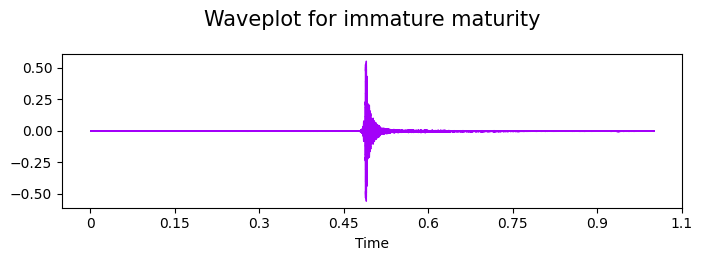

In [6]:
audio_immature, sr_immature = librosa.load(immature)
createWaveplot(audio_immature, sr_immature, "immature", '#A300F9')
ipd.Audio(immature)

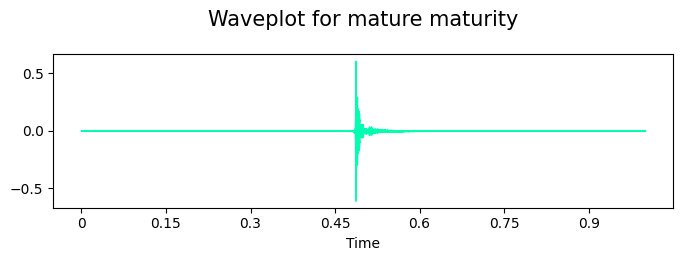

In [7]:
audio_mature, sr_mature = librosa.load(mature)
createWaveplot(audio_mature, sr_mature, "mature", '#00FFB0')
ipd.Audio(mature)

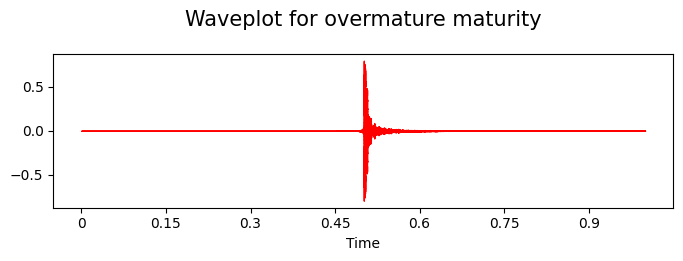

In [8]:
audio_overmature, sr_overmature = librosa.load(overmature)
createWaveplot(audio_overmature, sr_overmature, "overmature", '#FF0000')
ipd.Audio(overmature)

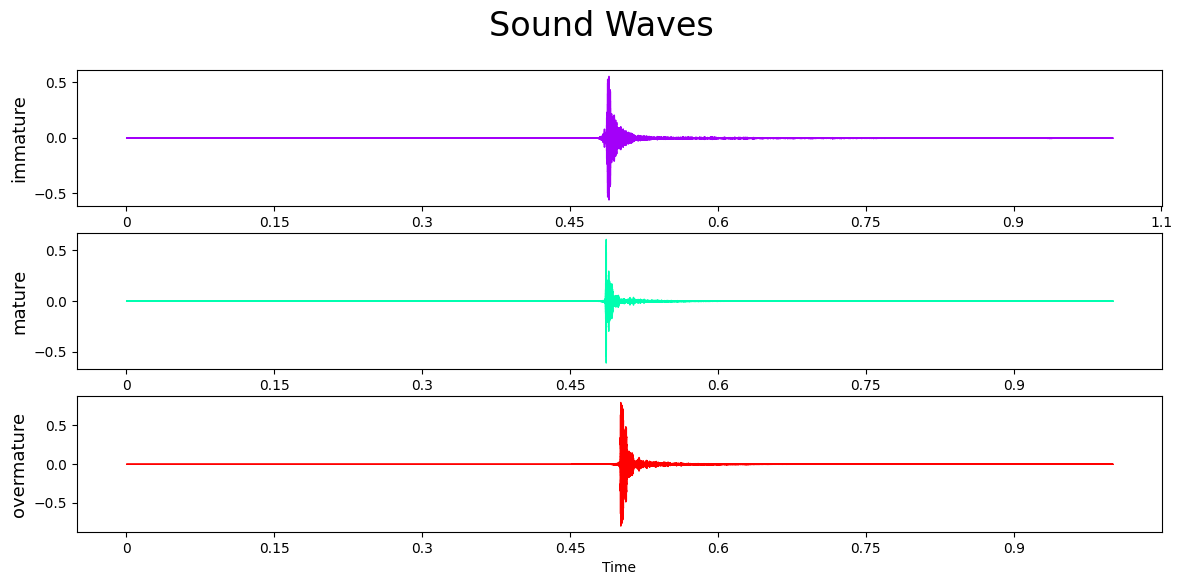

In [9]:
fig, ax = plt.subplots(3, figsize = (14, 6))
fig.suptitle('Sound Waves', fontsize=24)

librosa.display.waveshow(y = audio_immature, sr = sr_immature, color='#A300F9', ax=ax[0])
librosa.display.waveshow(y = audio_mature, sr = sr_mature, color='#00FFB0', ax=ax[1])
librosa.display.waveshow(y = audio_overmature, sr = sr_overmature, color='#FF0000', ax=ax[2])

for i, name in zip(range(3), classes):
    ax[i].set_ylabel(name, fontsize=13)

# Feature extraction

## PNCC

In [3]:
pnccs = []
vector_size = []

for filename in df_wav['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    result = pncc(wavSig, fs=sampRate)
    pnccs.append(result)
    vector_size.append(result.shape)

d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: invalid value encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: divide by zero encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:437: RuntimeWarning: invalid value encountered in multiply
  T = P * S_tilde


In [4]:
df_13 = df_wav.copy()
df_13['feature_array'] = pnccs
df_13['feature_array_size'] = vector_size

df_13

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature,"[[1.9822215851057952, -0.3148358106033424, 0.0...","(98, 13)"
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"


In [ ]:
df_13.to_csv('coconut-maturity-wav-extracted-default.csv', index=False)

## Cleaning data (after extraction)

In [5]:
df_13_cut = df_13[df_13['feature_array'].apply(lambda x: not np.isnan(x).any())]
df_13_cut

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
158,./Sample-kelapa/data/cut_sample/tua/wav/tua2c.wav,tua2c.wav,overmature,"[[2.021531665614917, -0.32578074400792156, 0.0...","(98, 13)"
162,./Sample-kelapa/data/cut_sample/tua/wav/tua4a.wav,tua4a.wav,overmature,"[[2.1749682479502663, -0.3603752471296788, -0....","(98, 13)"
174,./Sample-kelapa/data/cut_sample/tua/wav/tua8a.wav,tua8a.wav,overmature,"[[2.1839039600808268, -0.4485276294821634, 0.0...","(98, 13)"
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"


In [63]:
df_13_cut.to_csv('coconut-maturity-wav-extracted-default-cleaned.csv', index=False)

In [6]:
df_13_cut.reset_index(drop=True, inplace=True)
df_13_cut

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
134,./Sample-kelapa/data/cut_sample/tua/wav/tua2c.wav,tua2c.wav,overmature,"[[2.021531665614917, -0.32578074400792156, 0.0...","(98, 13)"
135,./Sample-kelapa/data/cut_sample/tua/wav/tua4a.wav,tua4a.wav,overmature,"[[2.1749682479502663, -0.3603752471296788, -0....","(98, 13)"
136,./Sample-kelapa/data/cut_sample/tua/wav/tua8a.wav,tua8a.wav,overmature,"[[2.1839039600808268, -0.4485276294821634, 0.0...","(98, 13)"
137,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"


In [14]:
stacked_data = np.stack(df_13_cut['feature_array'].values)
flattened_data = stacked_data.reshape((139, -1))
flattened_data.shape

(139, 1274)

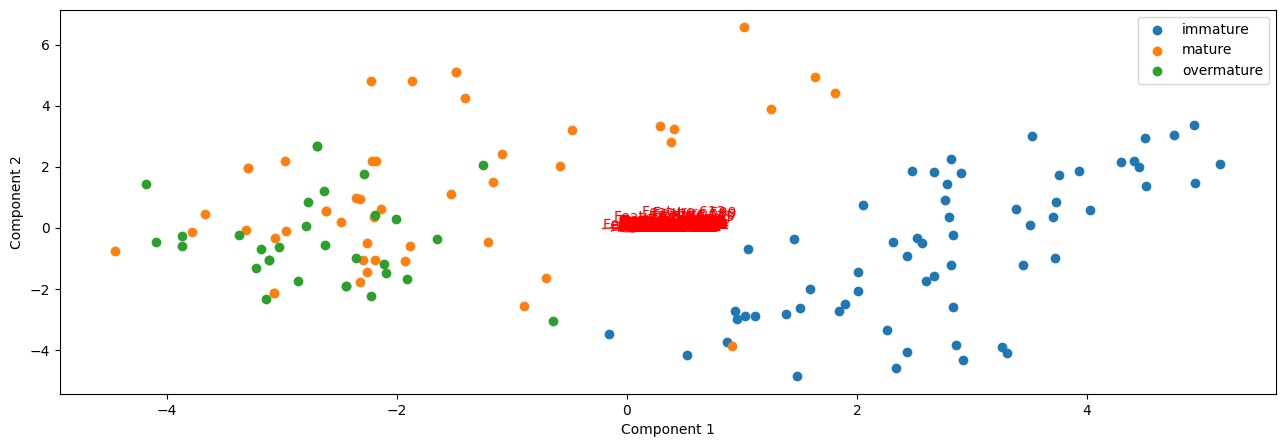

In [21]:
stacked_data = np.stack(df_13_cut['feature_array'].values)
flattened_data = stacked_data.reshape((139, -1))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = df_13_cut['class_name']

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, right=2, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# Plot the data points
for label in np.unique(df_13_cut['class_name']):
    subset = pca_df[pca_df['label'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], label=label)

# Plot the feature vectors (loadings)
loadings = pca.components_.T  # Transpose to match shape
for i, feature_vector in enumerate(loadings):
    ax.arrow(0, 0, feature_vector[0], feature_vector[1], color='r', alpha=0.8)
    ax.text(feature_vector[0], feature_vector[1], f'Feature {i+1}', color='r')

plt.legend()
plt.show()

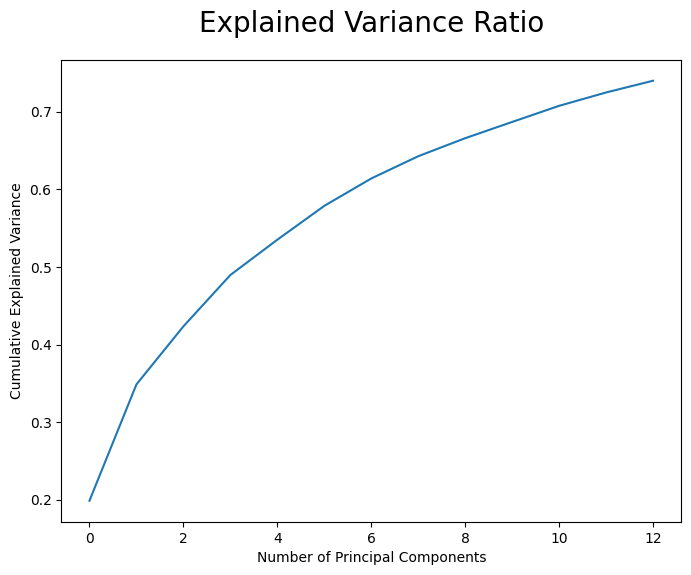

In [65]:
stacked_data = np.stack(df_13_cut['feature_array'].values)
data_reshaped = np.reshape(stacked_data, (139, 98*13))

pca = PCA(n_components=13)
pca.fit(data_reshaped)
pca_result = pca.transform(data_reshaped)

plt.subplots(figsize = (8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio', fontsize=20, pad=20)
plt.show()

## PCA

In [40]:
pca = PCA(n_components=13)  # Set the desired number of components
pca.fit(data_reshaped)
reduced_data = pca.transform(data_reshaped)

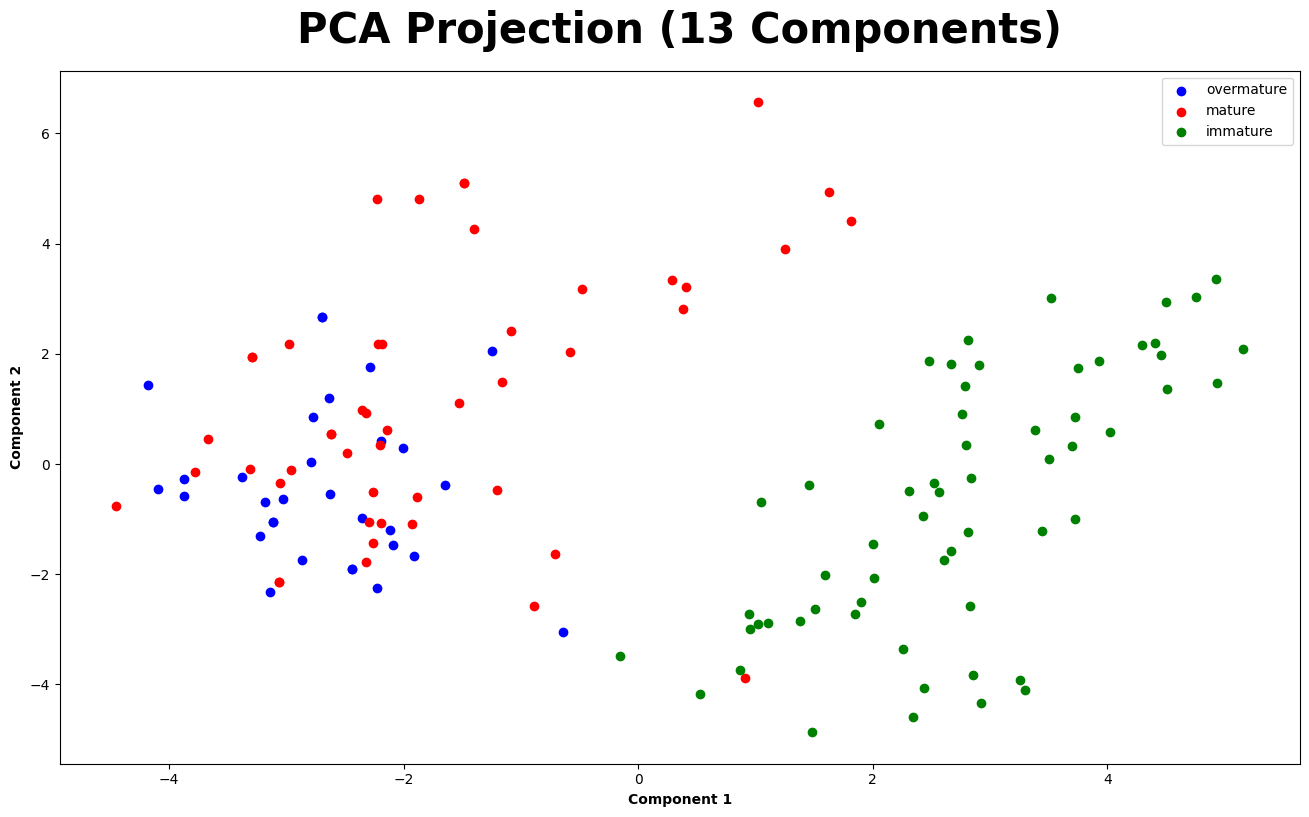

In [42]:
labels = df_13_cut['class_name'].values.tolist()

# Create a dictionary to map labels to colors for plotting
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

x = reduced_data[:, 0]
y = reduced_data[:, 1]

unique_labels = set(labels)

fig, ax = plt.subplots(figsize=(16, 9))
for label in unique_labels:
    indices = np.where(np.array(labels) == label)
    ax.scatter(x[indices], y[indices], c=label_colors[label], label=label)

plt.title('PCA Projection (13 Components)', fontsize=30, pad=20, fontweight='bold')
plt.xlabel('Component 1', fontweight='bold')
plt.ylabel('Component 2', fontweight='bold')

# Add a legend
ax.legend()

# Show the plot
plt.show()